In [130]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.datasets import load_iris

Data generation

In [131]:
data = load_iris()

In [132]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [133]:
data_x = data.data
print(f"Data shape {data.data.shape}")

Data shape (150, 4)


In [134]:
data_y = data.target
print(f"Data shape {data.target.shape}")

Data shape (150,)


# Gradient Desent

In [135]:
class LinearRegression(object):
    # constructor กำหนด Paramiter ต่าง ๆ
    def __init__(self, data_x, data_y,
                w_init = None, b_init = None, learning_rate = 0.1 ):
        
        scale = 4.0
        self.x = data_x
        self.y = data_y
        self.lr = learning_rate
        
        
        #เอาไว้เก็บการ updata หรือ history ต่างๆ
        self.loss_history = []
        self.epochs = []
        self.w_history = []
        self.b_history = []
        
        
        '''
        
        ตั้งเงื่อนไข ของการกำหนดค่า Innitizer ของ W, B
        ถ้ามีการรับค่า paramiter เข้ามาจะให้ w_init and b_init เป็น ค่าที่รับเข้ามาเลย
    
        '''
        if w_init is not None:
            #self.w = w_init 
            self.w = np.random.uniform(low = -w_init, high = w_init, size = (4, 1))
            #print(f"Weigth shape {self.shape}")
            
        else:
            #init w
            self.w = np.random.uniform(low = a - scale, high = a + scale)
        
        if b_init is not None:
            #self.b = b_init
            self.b = np.random.uniform(low = -b_init, high = b_init, size = (1, 1))
        else:
            #init b
            self.b = np.random.uniform(low = a - scale, high = a + scale)
        
        
    def sigmoid(self ,X):
        return 1/(1+np.exp(-X))
    
    def inference(self, x):
        '''
        Inference เป็น function ของ model 
        y_pred = W*X + B
        หรือ InearRegression 
        
        ให้ Return คำตอบ ที่ได้จากการคำนวน ออกจาก Method
        
        '''
        
        y_pred = np.dot(x, self.w) + self.b
        
        return y_pred
   

    def loss_function(self, labels, prediction):
        #MSE
        #Return mean ของ data shape : 0-rank Tensor (Vector) array
        
        loss = np.mean((prediction - labels)**2)
        
        return loss
    
        
    def loss_derivative(self):
        """
        การหาอนุพัน หรือกับ ดิป 
        
        Return :
            dw: dl /dw , ของค่า mean
            db: dl / db
        """
        
        dw = np.mean((self.y_pred - self.y) * self.x)
        db = np.mean(self.y_pred - self.y)
        
        return dw, db
    
    def updata_weights(self):
        """
        w = w - learning_rate * (dl/dw)
        
        """
        self.w = self.w - self.lr * self.dw
        self.b = self.b - self.lr * self.db
        
    def history(self, loss, w, b):
        
        self.loss_history.append(loss)
        self.w_history.append(w)
        self.b_history.append(b)
        
    def fit(self, max_epoch):
        
        pre_loss = 0.
        for epoch in range(max_epoch):
            
            print(epoch)
            self.y_pred = self.inference(self.x)
            self.sigmoid(self.y_pred)
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)

            self.dw, self.db = self.loss_derivative()
            self.updata_weights()
            #if np.abs(pre_loss - self.loss) <1e-6:
                
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)
            print(f"Epoch {epoch+1} loss: {self.loss}")
            #Weights {self.w} Biases {self.b}")

                #break
            pre_loss = self.loss
            
        self.epochs.append(epoch)
        self.w_history = np.array(self.w_history)
        self.b_history = np.array(self.b_history)


In [136]:
data_x.shape

(150, 4)

In [137]:
data_y.resize(150, 1)
data_y.shape

(150, 1)

In [138]:
%time
epoch = 50
model1 = LinearRegression(data_x, data_y, 2, 1, 0.001)
#print(f'Weigths shape {self.w}')

Wall time: 0 ns


In [141]:
model1.fit(epoch)

0
Epoch 1 loss: 23.11820853819959
1
Epoch 2 loss: 22.81530263611532
2
Epoch 3 loss: 22.54257093901051
3
Epoch 4 loss: 22.296992011274845
4
Epoch 5 loss: 22.075846964384287
5
Epoch 6 loss: 21.876689161785848
6
Epoch 7 loss: 21.69731695734005
7
Epoch 8 loss: 21.535749163559903
8
Epoch 9 loss: 21.39020297630244
9
Epoch 10 loss: 21.259074109939284
10
Epoch 11 loss: 21.14091892166324
11
Epoch 12 loss: 21.03443832575156
12
Epoch 13 loss: 20.938463318551257
13
Epoch 14 loss: 20.851941952899057
14
Epoch 15 loss: 20.77392761683902
15
Epoch 16 loss: 20.703568486033777
16
Epoch 17 loss: 20.640098032343353
17
Epoch 18 loss: 20.582826482813754
18
Epoch 19 loss: 20.531133133907325
19
Epoch 20 loss: 20.48445943533661
20
Epoch 21 loss: 20.44230276643846
21
Epoch 22 loss: 20.40421083574195
22
Epoch 23 loss: 20.369776641327466
23
Epoch 24 loss: 20.33863393582293
24
Epoch 25 loss: 20.310453145506113
25
Epoch 26 loss: 20.284937698041702
26
Epoch 27 loss: 20.261820717935105
27
Epoch 28 loss: 20.24086205288

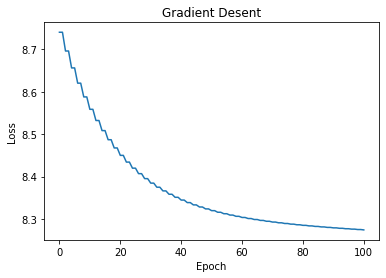

In [142]:
plt.plot(model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Gradient Desent")
plt.show()

# New Optimizer

In [143]:
class LinearRegression(object):
    # constructor กำหนด Paramiter ต่าง ๆ
    def __init__(self, data_x, data_y,
                w_init = None, b_init = None, learning_rate = 0.1 ):
        
        scale = 4.0
        self.x = data_x
        self.y = data_y
        self.lr = learning_rate
        self.t = 1
        
        #เอาไว้เก็บการ updata หรือ history ต่างๆ
        self.loss_history = []
        self.epochs = []
        self.w_history = []
        self.b_history = []
        
        
        '''
        
        ตั้งเงื่อนไข ของการกำหนดค่า Innitizer ของ W, B
        ถ้ามีการรับค่า paramiter เข้ามาจะให้ w_init and b_init เป็น ค่าที่รับเข้ามาเลย
    
        '''
        if w_init is not None:
            #self.w = w_init 
            self.w1 = np.random.uniform(low = -w_init, high = w_init, size = (4, 1))
            self.w2 = np.random.uniform(low = -w_init, high = w_init, size = (4, 1))
            
            self.b1 = np.random.uniform(low = -w_init, high = w_init, size = (1, 1))
            self.b2 = np.random.uniform(low = -w_init, high = w_init, size = (1, 1))
            
            self.w = self.w1 + 0.2 *(self.w1 - self.w2)
            self.b = self.b1 + 0.2 * (self.b1 - self.b2)

            
            
    
        
        
    def sigmoid(self ,X):
        return 1/(1+np.exp(-X))
    
    def inference(self, x):
        '''
        Inference เป็น function ของ model 
        y_pred = W*X + B
        หรือ InearRegression 
        
        ให้ Return คำตอบ ที่ได้จากการคำนวน ออกจาก Method
        
        '''
        
        y_pred = np.dot(x, self.w) + self.b
        
        return y_pred
   

    def loss_function(self, labels, prediction):
        #MSE
        #Return mean ของ data shape : 0-rank Tensor (Vector) array
        
        loss = np.mean((prediction - labels)**2)
        
        return loss
    
        
    def loss_derivative(self):
        """
        การหาอนุพัน หรือกับ ดิป 
        
        Return :
            dw: dl /dw , ของค่า mean
            db: dl / db
        """
        
        dw = np.mean((self.y_pred - self.y) * self.x)
        db = np.mean(self.y_pred - self.y)
        return dw, db
    
    def updata_weights(self):
        """
        w = w - learning_rate * (dl/dw)
        
        """
        self.w = self.w - self.lr * self.dw
        self.b = self.b - self.lr * self.db
        
        self.w = (1 - 1/self.t) * self.w + 1/self.t * self.w
        self.b = (1- 1/self.t) * self.b + 1/self.t * self.b
        
        
    def history(self, loss, w, b):
        
        self.loss_history.append(loss)
        self.w_history.append(w)
        self.b_history.append(b)
        
    def fit(self, max_epoch):
        
        pre_loss = 0.
        for epoch in range(max_epoch):
            
            print(epoch)
            self.y_pred = self.inference(self.x)
            self.sigmoid(self.y_pred)
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)

            self.dw, self.db = self.loss_derivative()
            self.updata_weights()
            #if np.abs(pre_loss - self.loss) <1e-6:
                
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)
            print(f"Epoch {epoch+1} loss: {self.loss}")
            #Weights {self.w} Biases {self.b}")

                #break
            pre_loss = self.loss
            
        self.epochs.append(epoch)
        self.w_history = np.array(self.w_history)
        self.b_history = np.array(self.b_history)


In [144]:
%time
epoch = 50
model2 = LinearRegression(data_x, data_y, 2, 1, 0.001)

Wall time: 0 ns


In [145]:
model2.fit(epoch)

0
Epoch 1 loss: 109.6633130112905
1
Epoch 2 loss: 98.97070463001063
2
Epoch 3 loss: 89.34876391851562
3
Epoch 4 loss: 80.6902811192355
4
Epoch 5 loss: 72.89878176871328
5
Epoch 6 loss: 65.88745173444597
6
Epoch 7 loss: 59.578169891607416
7
Epoch 8 loss: 53.90063766128937
8
Epoch 9 loss: 48.79159571117293
9
Epoch 10 loss: 44.19411909074565
10
Epoch 11 loss: 40.05698294713513
11
Epoch 12 loss: 36.33409175407077
12
Epoch 13 loss: 32.98396569417843
13
Epoch 14 loss: 29.969278471641573
14
Epoch 15 loss: 27.25644140532368
15
Epoch 16 loss: 24.81522916812452
16
Epoch 17 loss: 22.618443002385206
17
Epoch 18 loss: 20.64160765873172
18
Epoch 19 loss: 18.86269868150942
19
Epoch 20 loss: 17.261897002096298
20
Epoch 21 loss: 15.821368105660127
21
Epoch 22 loss: 14.525063310733227
22
Epoch 23 loss: 13.358540947369717
23
Epoch 24 loss: 12.308805441369577
24
Epoch 25 loss: 11.36416251157131
25
Epoch 26 loss: 10.514088866754419
26
Epoch 27 loss: 9.749114950254231
27
Epoch 28 loss: 9.060719425775186
28


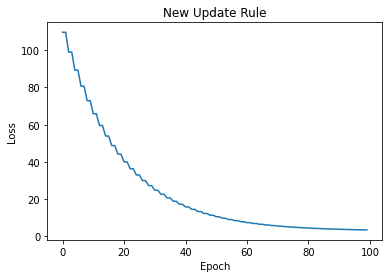

In [146]:
plt.plot(model2.loss_history)
#plt.plot(model1.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("New Update Rule")
plt.show()